# Image Recognition in Keras

### SET UP

In [23]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

np.random.seed(0) 
tf.random.set_seed(0)
random.seed(0)

### DATA FORMATTING

In [17]:
img_rows, img_cols = 28, 28  
num_classes = 10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# reshape data (it could depend on Keras backend)
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# rescale 
X_train /= 255
X_test /= 255
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

### SOME DEFINITIONS

In [4]:
def create_DNN():
    #random.seed(0)
    # create and add layer
    model = tf.keras.Sequential([tf.keras.Input(shape=(img_rows*img_cols,)), Dense(400, activation='relu')])
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5 combatte overfitting
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [22]:
def compile_model(opt):
    #random.seed(0)
    # Dictionary for the optimizers
    optimizers = {
        'sgd': SGD(),
        'rmsprop': RMSprop(),
        'adam': Adam(),
        'adagrad': Adagrad(),
        'adadelta': Adadelta(),
        'adamax': Adamax(),
        'nadam': Nadam()
    }
    model = create_DNN()
    optimizer = optimizers.get(opt.lower(), SGD())  # Default is sgd
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['acc'])
    
    return model

### START FROM HERE: TRAINING

In [20]:
batch_size = 32
epochs = 20
#DIFFERENT CHOICES FOR OPTIMIZER:

model_DNN = compile_model('sgd') #old choice, good choice
#model_DNN = compile_model('rmsprop') #not bad not excellent
#model_DNN = compile_model('adam')  #better than adagrad
#model_DNN = compile_model('adagrad')

history = model_DNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.6413 - loss: 1.1707 - val_acc: 0.9138 - val_loss: 0.3119
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.8820 - loss: 0.4141 - val_acc: 0.9315 - val_loss: 0.2380
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.9075 - loss: 0.3236 - val_acc: 0.9428 - val_loss: 0.1983
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.9216 - loss: 0.2751 - val_acc: 0.9495 - val_loss: 0.1723
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.9310 - loss: 0.2435 - val_acc: 0.9548 - val_loss: 0.1561
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.9384 - loss: 0.2191 - val_acc: 0.9581 - val_loss: 0.1418
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.9437 - loss: 0.2001 - val_acc: 0.9615 - val_loss: 0.1303
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.9485 - loss: 0.1829 - val_acc: 0.9634 - val_loss: 0.1216
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━

### EVALUATION

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9720 - loss: 0.0869

Test loss: 0.07388076931238174
Test accuracy: 0.9760000109672546


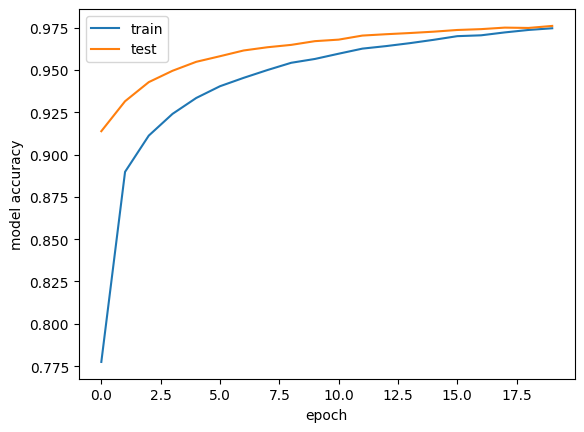

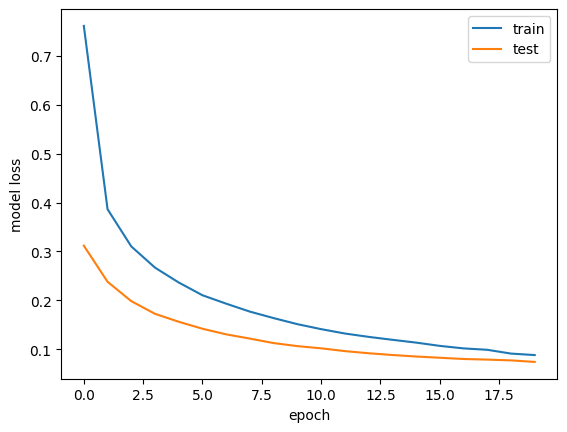

In [21]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### PREDICTIONS

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


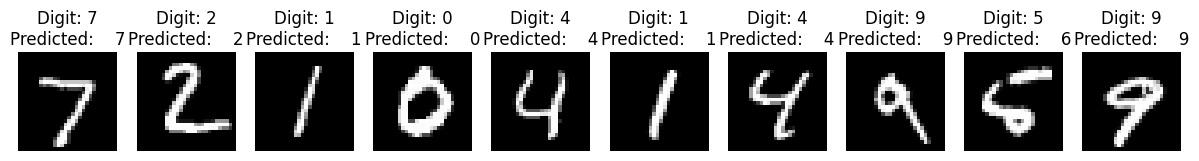

In [8]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()